In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [13]:
a, b, c = 0.1, -0.1, 0.2

In [20]:
T = 1000
e = np.random.randn(T)
x = np.zeros(T)
x[:5] = e[:5]

In [19]:
for j in range(5, len(x)):
    x[j] = (
        a * b * e[j - 5]
        + b * e[j - 4]
        + a * e[j - 1]
        + e[j]
        + x[j - 1]
        + x[j - 4]
        - x[j - 5]
    )

In [42]:
for j in range(5, len(x)):
    x[j] = e[j] + a * e[j - 1] + b * e[j - 4] + a * b * e[j - 5] + x[j - 1]

In [30]:
for j in range(5, len(x)):
    x[j] = x[j - 1] + a * x[j - 4] - a * x[j - 5] + e[j] + c * e[j - 1]

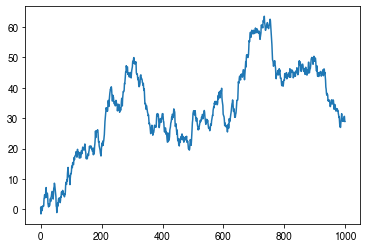

In [32]:
plt.plot(x)

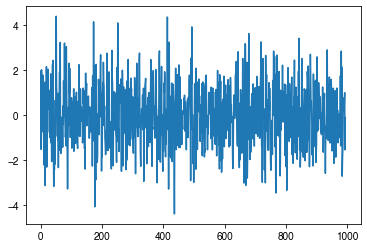

In [34]:
# y = diff(x)
plt.plot(y)

In [33]:
y = diff(x, k_seasonal_diff=1, seasonal_periods=4)

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.tools import diff

In [40]:
result = SARIMAX(x, order=(1, 1, 0), seasonal_order=(0, 0, 0, 12)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43992D+00    |proj g|=  2.19902D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   3.794D-05   1.440D+00
  F =   1.4399212365204084     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [41]:
result.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1439.921
Date:                Sun, 10 Oct 2021   AIC                           2883.842
Time:                        22:28:32   BIC                           2893.656
Sample:                             0   HQIC                          2887.572
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1417      0.030      4.712      0.000       0.083       0.201
sigma2         1.0458      0.046     22.893      0.000       0.956       1.135
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.86   Prob(JB):                         0.72
Heteroskedasticity (H):               0.87   Skew:                            -0.03
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

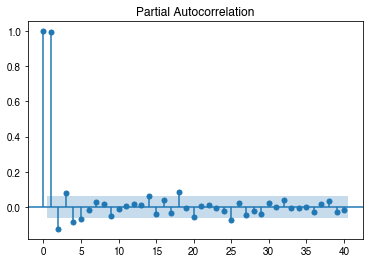

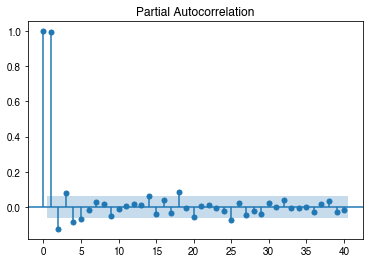

In [42]:
sm.graphics.tsa.plot_pacf(x, lags=40)

In [1]:
from data import create_dataset

In [5]:
x = create_dataset(1, 1000)[0]

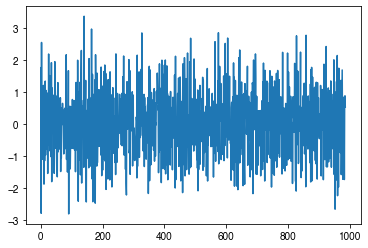

In [11]:
plt.plot(diff(x, k_seasonal_diff=1, seasonal_periods=12))